In [5]:
import pandas as pd

In [6]:
from pathlib import Path

In [7]:
data_dir = Path('/Users/avaisman/tmp/DataMisc/city=Jakarta')
df = pd.concat(
    pd.read_parquet(parquet_file)
    for parquet_file in data_dir.glob('*.parquet')
)
print(f"Finished reading {len(df)} records")

Finished reading 55988420 records


In [8]:
import math
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from IPython.display import clear_output
import kaleido

 
import matplotlib.pyplot as plt
import io
import shapely as shp
from shapely.geometry import Point, LineString, Polygon
from os.path import exists
from urllib.request import urlretrieve
import cartopy as cp

import requests
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator
%matplotlib inline
import hvplot.pandas 
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from holoviews import dim
import warnings

warnings.filterwarnings("ignore")

In [9]:
df.head()

,trj_id,driving_mode,osname,pingtimestamp,rawlat,rawlng,speed,bearing,accuracy
0,32903,motorcycle,android,1555645295,-6.214046,106.863081,5.310000,114,4.551
1,19636,car,android,1555481128,-6.225396,106.734492,3.290000,173,3.891
2,54661,car,android,1554692413,-6.192424,106.848922,0.000000,243,3.000
3,58169,car,ios,1554889275,-6.288463,106.824965,5.360000,190,10.000
4,79157,car,ios,1554712604,-6.173193,106.876781,13.136877,190,6.000


In [10]:
SAMPLE_SIZE = 300000
# this cell can take a few minutes to run dependingon the sample size
data = df.sample(SAMPLE_SIZE, random_state = 0) # data sampling for faster computing

In [11]:
data.head()

,trj_id,driving_mode,osname,pingtimestamp,rawlat,rawlng,speed,bearing,accuracy
206426,33962,motorcycle,android,1554952978,-6.188580,106.663879,9.139999,294,3.900
781569,13244,motorcycle,android,1555582844,-6.218619,106.867527,3.750000,163,9.648
3411611,2229,car,android,1555509864,-6.174710,106.811573,13.483664,345,3.900
3217039,55002,motorcycle,android,1555480165,-6.341882,106.792572,10.750000,10,3.900
4318315,43630,car,android,1555000789,-6.272683,106.713925,0.000000,0,3.000


In [13]:
len(data)

300000

In [18]:
data.to_csv('/Users/avaisman/tmp/DataMisc/Jakarta.csv',index=False)

In [14]:
data.head()

,trj_id,driving_mode,osname,pingtimestamp,rawlat,rawlng,speed,bearing,accuracy
206426,33962,motorcycle,android,1554952978,-6.188580,106.663879,9.139999,294,3.900
781569,13244,motorcycle,android,1555582844,-6.218619,106.867527,3.750000,163,9.648
3411611,2229,car,android,1555509864,-6.174710,106.811573,13.483664,345,3.900
3217039,55002,motorcycle,android,1555480165,-6.341882,106.792572,10.750000,10,3.900
4318315,43630,car,android,1555000789,-6.272683,106.713925,0.000000,0,3.000


In [70]:
import pysal
import seaborn  
import contextily 

In [16]:
import geopandas
 
data.sort_values('rawlat')
 
data.head()

,trj_id,driving_mode,osname,pingtimestamp,rawlat,rawlng,speed,bearing,accuracy
206426,33962,motorcycle,android,1554952978,-6.188580,106.663879,9.139999,294,3.900
781569,13244,motorcycle,android,1555582844,-6.218619,106.867527,3.750000,163,9.648
3411611,2229,car,android,1555509864,-6.174710,106.811573,13.483664,345,3.900
3217039,55002,motorcycle,android,1555480165,-6.341882,106.792572,10.750000,10,3.900
4318315,43630,car,android,1555000789,-6.272683,106.713925,0.000000,0,3.000


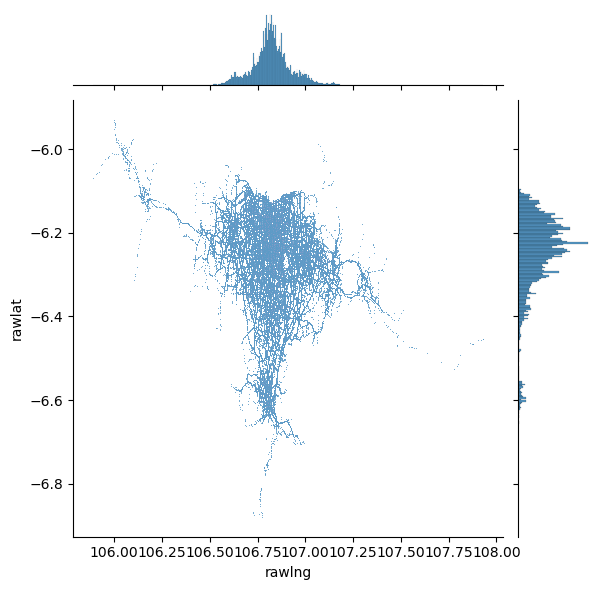

In [60]:
# Generate scatter plot
seaborn.jointplot(x="rawlng", y="rawlat", data=data, s=0.5)
 

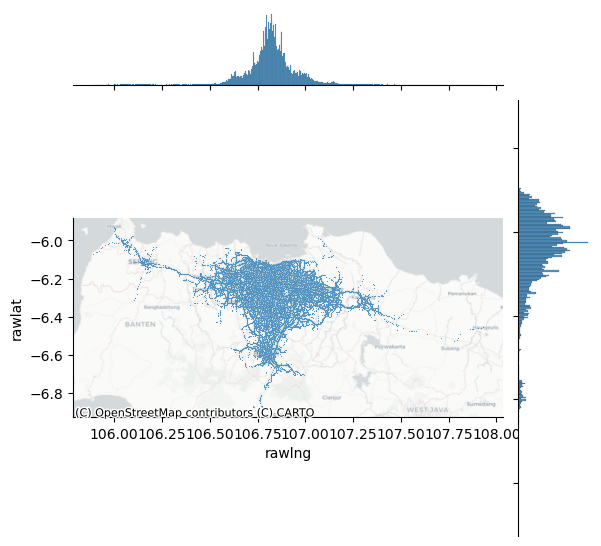

In [35]:
# Generate scatter plot
joint_axes = seaborn.jointplot(
    x="rawlng", y="rawlat", data=data, s=0.6 
)


contextily.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.Positron,
);

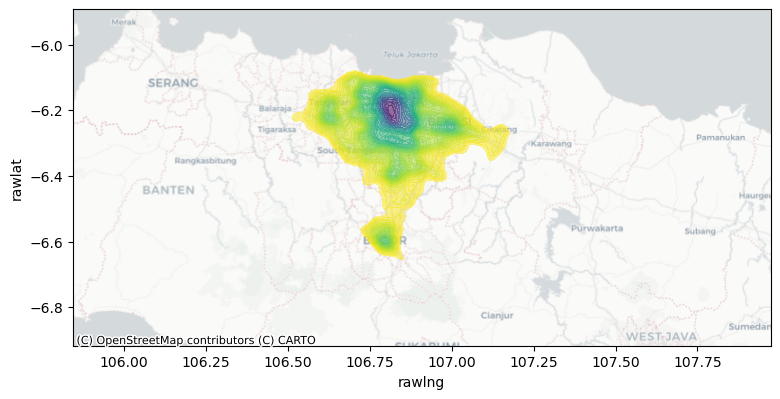

In [28]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Generate and add KDE with a shading of 50 gradients
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
seaborn.kdeplot(
    x="rawlng",
    y="rawlat",
    data=data,
    n_levels=50,
    shade=True,
    alpha=0.55,
    cmap="viridis_r",
)
# Add basemap

#contextily.add_basemap(
#    joint_axes.ax_joint,
#    crs="EPSG:4813",
#    source=contextily.providers.CartoDB.Positron   
contextily.add_basemap(
    ax, 
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.Positron
)
# Remove axes
#ax.set_axis_off()

In [64]:
fig = plt.figure(figsize=(1,1))

<Figure size 100x100 with 0 Axes>

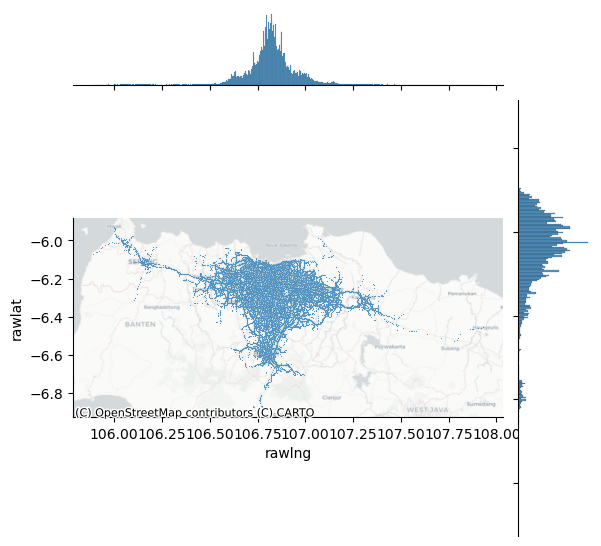

In [89]:
# Generate scatter plot



joint_axes = seaborn.jointplot(
    x="rawlng", y="rawlat", data=data, s=0.6)
joint_axes.ax_joint.set_aspect('auto')
 

contextily.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.Positron,
);
